In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [4]:
n = 500
gender_data = []
income_data = []

In [5]:
for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    

In [10]:
Height = 160 + 15 * np.random.randn(n)
Weight = 60 + 10 * np.random.randn(n)
Age = 25 + 10 * np.random.randn(n)
Income = 1.8 + 5.0 * np.random.randn(n)

In [11]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic status': income_data,
    'Height': Height,
    'Weight': Weight,
    'Age': Age,
    'Income': Income
})

In [13]:
data.shape

(500, 6)

In [14]:
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Middle Class,180.480378,60.024421,20.555177,6.031872
1,Male,Middle Class,154.952214,52.299638,20.478671,3.227276
2,Male,Rich,172.386120,59.313532,28.789046,-4.861818
3,Female,Rich,180.399704,62.319323,15.812870,1.257620
4,Female,Poor,158.279528,61.693562,33.465420,3.568157


In [20]:
%matplotlib inline

(array([  4.,  14.,  40.,  78., 125., 112.,  82.,  34.,   8.,   3.]),
 array([-6.21089909,  0.11061097,  6.43212103, 12.7536311 , 19.07514116,
        25.39665122, 31.71816128, 38.03967135, 44.36118141, 50.68269147,
        57.00420153]),
 <a list of 10 Patch objects>)

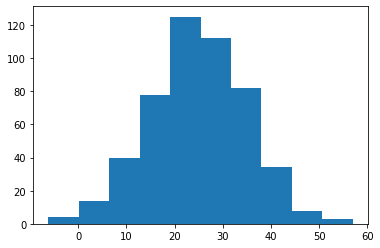

In [22]:
plt.hist(data['Age'])